In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
import scipy.signal

# 1. Un semnal este digitizat cu o frecventa de esantionare de 2000 Hz.
##   (a) Care este intervalul de timp intre doua esantioane? 

        1/2000 = 0.0005 secunde = 0.5 ms

##   (b) Daca un esantion este memorat pe 4 biti, cati bytes vor ocupa 1 ora de achizitie?
        2000 esantioane pe secunda = 120000 esantioane pe minut = 7200000 esantioane pe ora
        un esantion ocupa 4 biti = 0.5 bytes 
        => 7200000 * 0.5 = 3600000 bytes ocupati pe ora

# 2. Fie semnalele continue x(t) = cos(200 ${\pi}$ t) si y(t) = cos(80 ${\pi}$ t) si suma lor, z(t) = x(t) + y(t). Care este frecventa minima de esantionare pentru z(t)astfel incat sa nu se produca fenomenul de aliere?
Notez 
* $f_{0}$ = frecventa functiei z
* $f_{1}$ = frecventa functiei x
* $f_{2}$ = frecventa functiei y


$f_{1} = \frac{200\pi}{2\pi} = 100$ (perioada functiei cos este $2\pi$)

$f_{2} = \frac{80\pi}{2\pi} = 40$

$f_{0} = gcd({f_1}, {f_2}) = 20$

    Frecventa functiei z se poate observa si in graficul urmator: 

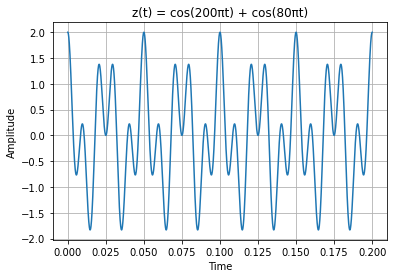

In [3]:

# in grafic se pot observa 4 oscilatii in 0.2 secunde, adica 20 de oscilatii pe secunda
def x(t):
    return np.cos(200 * np.pi * t)

def y(t):
    return np.cos(80 * np.pi * t)

def z(t):
    return x(t) + y(t)

time_of_view = 0.2
atime = np.linspace(0, time_of_view, int(10e5))
asignal = z(atime)

plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("z(t) = cos(200πt) + cos(80πt)")
plt.plot(atime, asignal)
plt.grid(True)
plt.show()

## Sampling theorem: ${f_s} \geq 2  {f_0}$ => Frecventa minima de esantionare pentru z este de 40 Hz

# 3. Fie semnalele continue x(t) = cos(520 $\pi$ t + $\pi$ / 3), y(t) = cos(280 $\pi$ t − $\pi$ / 3) si z(t) = cos(120 $\pi$ t + $\pi$ / 3).
##  (a) In Python, simulati axa reala de timp printr-un sir de numere suficient de apropiate, spre exemplu [0 : 0.0005 : 0.03].

In [4]:
atime = np.linspace(0, 0.03, int(0.03/0.0005))

## (b) Construiti semnalele x(t), y(t) si z(t) si afisati-le grafic.

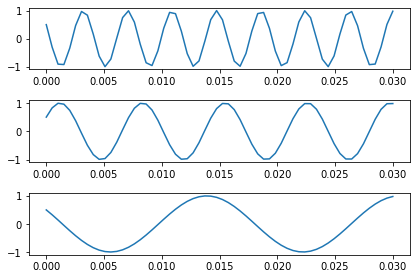

In [5]:
def x(t):
    return np.cos(520 * np.pi * t + np.pi / 3)

def y(t):
    return np.cos(280 * np.pi * t - np.pi / 3)

def z(t):
    return np.cos(120 * np.pi * t + np.pi / 3)

fig, axs = plt.subplots(3)
fig.tight_layout(pad=1.0) # distanteaza subploturile

axs[0].plot(atime, x(atime))
axs[1].plot(atime, y(atime))
axs[2].plot(atime, z(atime))

plt.show()

## (c) Esantionati semnalele cu o frecventa de 200 Hz pentru a obtine x[n],y[n] si z[n] si afisati-le grafic.

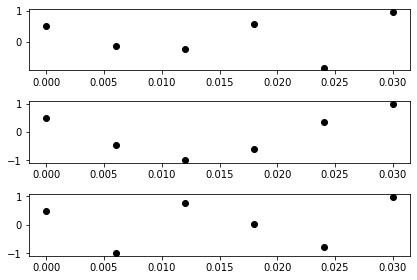

In [6]:
sample_size = 6 # 200Hz inseamna 6 oscilatii in 0.03 secunde 
time = np.linspace(0, 0.03, sample_size)

fig, axs = plt.subplots(3)
fig.tight_layout(pad=1.0)

axs[0].scatter(time, x(time), color = '#000000')
axs[1].scatter(time, y(time), color = '#000000')
axs[2].scatter(time, z(time), color = '#000000')

plt.show()

## (d) Reprezentati grafic pozitiile esantioanelor pentru a obtine Figura 1 si observati fenomenul de aliere.

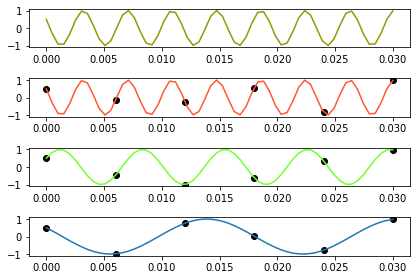

In [7]:
fig, axs = plt.subplots(4)
fig.tight_layout(pad=1.0)

axs[0].plot(atime, x(atime), color = '#949900')
axs[1].plot(atime, x(atime), color = '#ff5733')
axs[2].plot(atime, y(atime), color = '#71ff33')
axs[3].plot(atime, z(atime))

axs[1].scatter(time, x(time), color = '#000000')
axs[2].scatter(time, y(time), color = '#000000')
axs[3].scatter(time, z(time), color = '#000000')

plt.show()

# 4. Puterea unui semnal este ${P_{semnal}} = 80dB$. Se cunoaste raportul semnal-zgomot, ${SNR_{dB}} = 90dB$. Care este puterea zgomotului?
## ${P_{semnal_{db}}} = 80dB $

## ${P_{semnal_{db}}} = 10log(P_{semnal})$

## $10log(P_{semnal}) = 80dB => P_{semnal} = 10^8$

## ${SNR_{dB}} = 90dB = 10log(SNR)$

## $10log(SNR) = 90dB => SNR = 10^9$

## $SNR = \frac{P_{semnal}}{P_{zgomot}}$

## $10^9 = \frac{10^8}{P_{zgomot}} => P_{zgomot} = \frac{1}{10} $

# 5. (Bonus) Fisierul sound.wav contine doua sunete a caror frecventa scade cu timpul. Incarcati fisierul si afisati spectrograma.

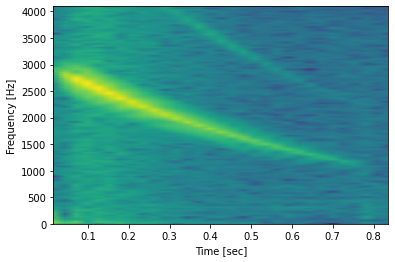

In [45]:
rate, x = scipy.io.wavfile.read("sound.wav")
f,t,s = scipy.signal.spectrogram(x, fs=rate)

fig = plt.figure()
plt.pcolormesh(t, f, 10*np.log10(s), shading="gouraud")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
plt.show()